In [1]:
#   Are we using a GPU?
!nvidia-smi

Wed May  8 18:40:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/2_datas_2_Class"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/drive/MyDrive/2_datas_2_Class'.
There are 2 directories and 0 images in '/content/drive/MyDrive/2_datas_2_Class/Test'.
There are 0 directories and 107 images in '/content/drive/MyDrive/2_datas_2_Class/Test/Benign'.
There are 0 directories and 144 images in '/content/drive/MyDrive/2_datas_2_Class/Test/Malignant'.
There are 2 directories and 0 images in '/content/drive/MyDrive/2_datas_2_Class/Train'.
There are 0 directories and 568 images in '/content/drive/MyDrive/2_datas_2_Class/Train/Benign'.
There are 0 directories and 796 images in '/content/drive/MyDrive/2_datas_2_Class/Train/Malignant'.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/2_datas_2_Class/Train"
test_dir = "/content/drive/MyDrive/2_datas_2_Class/Test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_cancer = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

print("Testing images:")
test_data_cancer = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary")

Training images:
Found 1364 images belonging to 2 classes.
Testing images:
Found 251 images belonging to 2 classes.


In [5]:
#import depencencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [6]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [7]:
#let's make a create_model() function to create a model from a URL
def create_model(model_url,num_classes=2):
  """
  Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A Tensorflow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to the number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras Layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  #Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax',name ="output_layer")
  ])
  return model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [9]:
train_data_cancer.class_indices

{'Benign': 0, 'Malignant': 1}

In [11]:
!pip install opencv-python

In [12]:
import cv2

In [13]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)
image_width = 224
image_height = 224
classes = ['Benign', 'Malignant']
# Resimleri yüklemek için flow_from_directory kullanın
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/2_datas_2_Class/Train",
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Her sınıf için resimleri ayrı ayrı arttırın
for cls in classes:
    # Sınıfın resimlerini yüklemek için flow_from_directory kullanın
    cls_generator = datagen.flow_from_directory(
        directory="/content/drive/MyDrive/2_datas_2_Class/Train",
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=[cls]
    )

    # Resimleri arttırın ve kaydedin
    i = 0
    for batch in cls_generator:
        images, labels = batch
        for image in images:
            # Resmi kaydetmek için imwrite kullanın
            cv2.imwrite(os.path.join("/content/drive/MyDrive/2_datas_2_Class/Train", cls, f"augmented_{i}.jpg"), image * 255)
            i += 1
            if i >= 3000:  # Maksimum resim sayısına ulaşıldığında döngüyü durdur
                break
        else:
            continue
        break



Found 1364 images belonging to 2 classes.
Found 568 images belonging to 1 classes.
Found 796 images belonging to 1 classes.


In [14]:
augmented_images = os.listdir("/content/drive/MyDrive/2_datas_2_Class/Train/Malignant")

# Count the number of augmented images
num_malignant_images = len(augmented_images)

# Print the number of malignant images
print("Number of malignant images:", num_malignant_images)

Number of malignant images: 3796


In [15]:
augmented_images = os.listdir("/content/drive/MyDrive/2_datas_2_Class/Train/Benign")

# Count the number of augmented images
num_benign_images = len(augmented_images)

# Print the number of benign images
print("Number of benign images:", num_benign_images)

Number of benign images: 3568


In [16]:
#How many images in each folder?
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/2_datas_2_Class"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/2_datas_2_Class'.
There are 2 directories and 0 images in '/content/drive/MyDrive/2_datas_2_Class/Test'.
There are 0 directories and 107 images in '/content/drive/MyDrive/2_datas_2_Class/Test/Benign'.
There are 0 directories and 144 images in '/content/drive/MyDrive/2_datas_2_Class/Test/Malignant'.
There are 2 directories and 0 images in '/content/drive/MyDrive/2_datas_2_Class/Train'.
There are 0 directories and 3568 images in '/content/drive/MyDrive/2_datas_2_Class/Train/Benign'.
There are 0 directories and 3796 images in '/content/drive/MyDrive/2_datas_2_Class/Train/Malignant'.


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/2_datas_2_Class/Train"
test_dir = "/content/drive/MyDrive/2_datas_2_Class/Test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_cancer = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

print("Testing images:")
test_data_cancer = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary")

Training images:
Found 7364 images belonging to 2 classes.
Testing images:
Found 251 images belonging to 2 classes.


In [18]:
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [19]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [20]:
#let's make a create_model() function to create a model from a URL
def create_model(model_url,num_classes=2):
  """
  Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A Tensorflow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to the number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras Layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  #Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax',name ="output_layer")
  ])
  return model

In [21]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [22]:
#Create ResNet Model

resnet_model = create_model(resnet_url, train_data_cancer.num_classes)


In [23]:
#compile our resnet model
resnet_model.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [24]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 2)                 4098      
                                                                 
Total params: 23568898 (89.91 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [25]:
print(train_data_cancer.labels.shape)
print(test_data_cancer.labels.shape)

(7364,)
(251,)


In [26]:
resnet_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [31]:
#Let's fit our ResNet model to the data
resnet_history = resnet_model.fit(train_data_cancer,
                                  epochs=20,
                                  batch_size=16,
                                  steps_per_epoch=len(train_data_cancer),
                                  validation_data=test_data_cancer,
                                  validation_steps=len(test_data_cancer),
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                experiment_name="efficientnetb0_1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/efficientnetb0_1_percent_data_aug/20240508-192832
Epoch 1/20
231/231 [==============================] - 56s 242ms/step - loss: 0.4379 - accuracy: 0.8169 - val_loss: 0.7220 - val_accuracy: 0.6375
Epoch 2/20
231/231 [==============================] - 57s 245ms/step - loss: 0.4429 - accuracy: 0.8131 - val_loss: 0.7383 - val_accuracy: 0.6375
Epoch 3/20
231/231 [==============================] - 56s 241ms/step - loss: 0.4315 - accuracy: 0.8237 - val_loss: 0.7569 - val_accuracy: 0.6215
Epoch 4/20
231/231 [==============================] - 58s 250ms/step - loss: 0.4364 - accuracy: 0.8156 - val_loss: 0.7234 - val_accuracy: 0.6295
Epoch 5/20
231/231 [==============================] - 56s 243ms/step - loss: 0.4309 - accuracy: 0.8232 - val_loss: 0.7556 - val_accuracy: 0.6255
Epoch 6/20
231/231 [==============================] - 60s 258ms/step - loss: 0.4265 - accuracy: 0.8284 - val_loss: 0.7333 - val_accuracy: 0.6295
Epoch 7/20
231/231 [=========

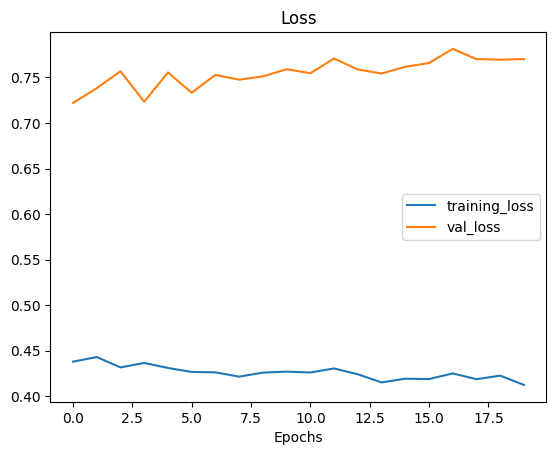

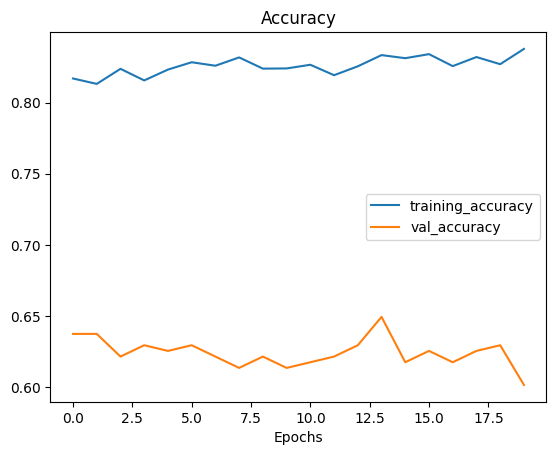

In [32]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow History object.

    Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot loss

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(resnet_history)

In [38]:
from sklearn.metrics import confusion_matrix

y_true = test_data_cancer.labels
y_pred = resnet_model.predict(test_data_cancer)
y_pred_binary = [int(round(p[0])) for p in y_pred]

confusion_matrix = confusion_matrix(y_true, y_pred_binary)

print(confusion_matrix)


8/8 [==============================] - 6s 776ms/step
[[58 49]
 [79 65]]


In [39]:

from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_binary)

print(report)


              precision    recall  f1-score   support

           0       0.42      0.54      0.48       107
           1       0.57      0.45      0.50       144

    accuracy                           0.49       251
   macro avg       0.50      0.50      0.49       251
weighted avg       0.51      0.49      0.49       251

